# Dimensionality Reduction on Airbnb Datasets
To ready the data for analysis, we will seek to reduce the number of fields to a more manageable number, before we apply data science techniques on it. The technique we will use is Principal Component Analysis (PCA), with the approach of grouping up fields in similar catagories.

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
abnb_listings = pd.read_csv("airbnb-sf-data/listings2.csv")

## Full list of available fields 
# calendar = pd.read_csv("airbnb-sf-data/calendar.csv")
# calendar2 = pd.read_csv("airbnb-sf-data/calendar2.csv")
# listings = pd.read_csv("airbnb-sf-data/listings.csv")
# listings2 = pd.read_csv("airbnb-sf-data/listings2.csv")
# nhoods = pd.read_csv("airbnb-sf-data/neighbourhoods.csv")
# reviews = pd.read_csv("airbnb-sf-data/reviews.csv")
# reviews2 = pd.read_csv("airbnb-sf-data/reviews2.csv")

The objective of this section is to reduce the dimensions of the listings data into the following fields:
1. ID, Lat and Long
2. Location
3. Space
4. Price
5. Description
6. Host
7. Rating
8. Reviews Per Month

In [11]:
list(abnb_listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


## 1. ID, Lat, and Long

In [12]:
listingid = abnb_listings['id']
latlong = abnb_listings[['latitude','longitude']]

## 2. Location

In [13]:
locationfields = [
 'latitude','longitude',
 'neighbourhood_cleansed',
]

## there are other location-related fields omitted:
#'street', proxy with zipcode
# 'zipcode', too many levels
#'neighbourhood', proxy with neighbourhood_cleansed
#'neighbourhood_group_cleansed', is NaN
#'city','state', equivalent to smart_location 
#'market', equivalent to city
#'country', equivalent to country code
#'is_location_exact', omit
#'smart_location', provisions for multi-city sets, same for entire dataset
#'country_code', provisions for multi-country sets, same for entire dataset

locationpre = abnb_listings[locationfields]

In [14]:
from sklearn.preprocessing import LabelEncoder
numerify = LabelEncoder()

locationpre['neighbourhood_cleansed'] = numerify.fit_transform(locationpre['neighbourhood_cleansed'].astype('str'))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
location = pca.fit_transform(locationpre)
location = [i[0] for i in location]
location = pd.DataFrame(pd.Series(location), columns=["location"])

/Users/tonyktan/Desktop/GA/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2

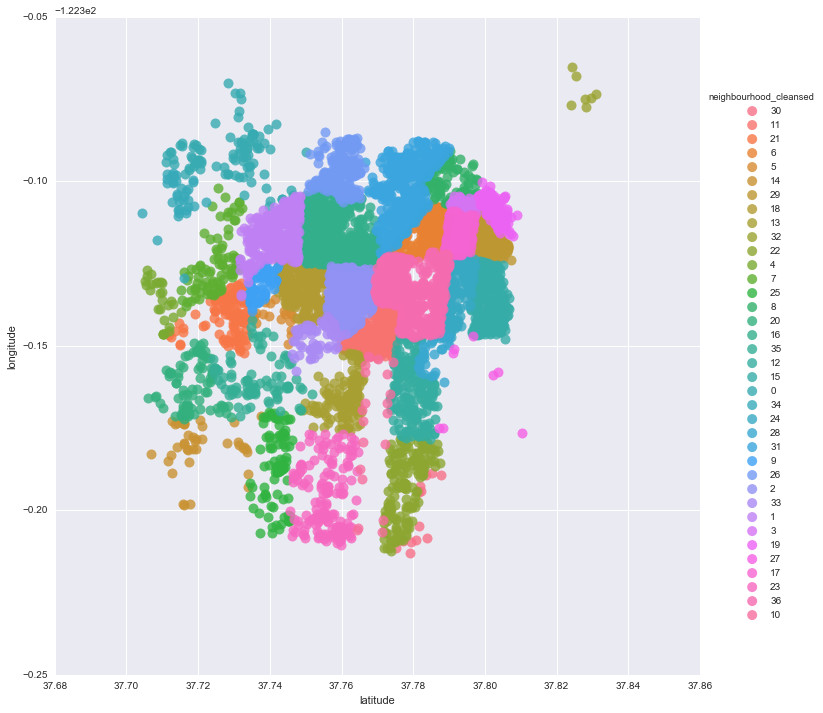

In [18]:
# Scatter plot based and assigne color based on 'label - y'
sns.lmplot('latitude', 'longitude', data=locationpre, fit_reg = False, hue = 'neighbourhood_cleansed', size = 10, scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
2 
# # value of the first two PCs, set the x, y axis boundary
# xs = pca.transform(locationpre)[:,0]
# ys = pca.transform(locationpre)[:,1]
 
# ## visualize projections
 
# ## Note: scale values for arrows and text are a bit inelegant as of now,
# ##       so feel free to play around with them
# for i in range(len(xvector)):
#     # arrows project features (ie columns from csv) as vectors onto PC axes
#     # we can adjust length and the size of the arrow
#     plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
#               color='r', width=0.005, head_width=0.05)
#     plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
#              list(locationpre.columns.values)[i], color='r')
 
# for i in range(len(xs)):
#     plt.text(xs[i]*1.08, ys[i]*1.08, list(locationpre.index)[i], color='b') # index number of each observations
# plt.title('PCA Plot of first PCs')

## 3. Space

In [15]:
spacefields = [
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type'
]
space = abnb_listings[spacefields]
space['wireless'] = abnb_listings.amenities.apply(lambda x: 1 if "Wireless Internet" in x else 0)
space.room_type = space.room_type.map({
"Shared room": 0,
"Private room": 1,
"Entire home/apt":2
})
space.property_type = space.property_type.map({
"Other": 0,
"Dorm": 1,
"Bed & Breakfast": 1,
"Cabin": 1,
"Camper/RV": 1,
"Boat": 1,
"Yurt": 1,
"Tent": 1,
"Treehouse": 1,
"Plane": 1,
"Apartment": 2,
"Condominium": 2,
"Loft": 2,
"Townhouse": 2,
"House": 2,        
"Bungalow": 3,
"Villa": 3,
"Island": 4,
"Castle": 4,
})
space.bed_type = space.bed_type.map({
"Couch": 0,
"Airbed": 1,
"Futon": 2,
"Pull-out Sofa": 2,
"Real Bed": 3  
})
space.fillna(0, inplace=True)

space1 = pca.fit_transform(space)
space1 = [i[0] for i in space1]
space1 = pd.DataFrame(pd.Series(space1), columns=["space"])

/Users/tonyktan/Desktop/GA/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/tonyktan/Desktop/GA/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


ValueError: operands could not be broadcast together with shapes (7029,3) (8,) 

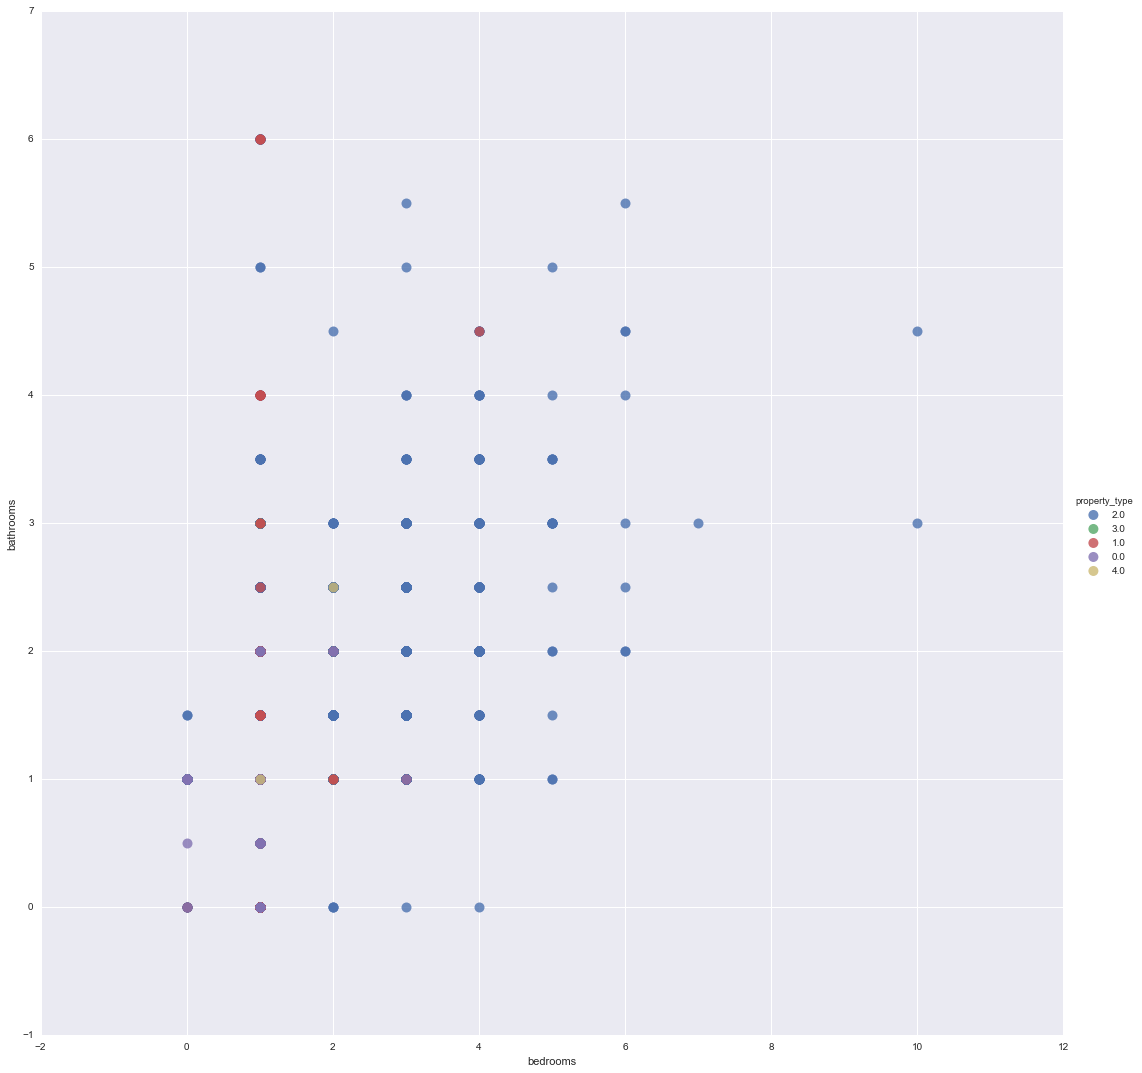

In [16]:
# Scatter plot based and assigne color based on 'label - y'
sns.lmplot('bedrooms', 'bathrooms', data=space, fit_reg = False, hue = 'property_type', size = 15, scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
2 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(locationpre)[:,0]
ys = pca.transform(locationpre)[:,1]
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(locationpre.columns.values)[i], color='r')
 
for i in range(len(xs)):
    plt.text(xs[i]*1.08, ys[i]*1.08, list(locationpre.index)[i], color='b') # index number of each observations
plt.title('PCA Plot of first PCs')

## 4. Price

In [ ]:
pricefields = [
 'price',
# 'weekly_price', # too many NaNs
# 'monthly_price', # too many NaNs
 'security_deposit',
 'cleaning_fee',
 'extra_people'
]
price = abnb_listings[pricefields]
price.fillna("$0", inplace=True)
for field in pricefields:
    price[field] = price[field].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

# Do away with PCA and just normalize price for addon costs
# price = pca.fit_transform(price)
# price = [i[0] for i in price]
# price = pd.DataFrame(pd.Series(price), columns=["price"])
price = pd.DataFrame(price.price + (price.security_deposit / 5) + 
                     (price.cleaning_fee / 3) + (price.extra_people / 3), columns=["price"])

## 5. Description

In [ ]:
descfields = [
 'name',
 'description',
 'neighborhood_overview',
 'notes',
 'transit'
]
description = abnb_listings[descfields].fillna("")
description =  description['name'] + " " + description['description'] + " " + description['neighborhood_overview'] \
+ " " + description['notes'] + " " + description['transit']
description = pd.DataFrame(description, columns=["description"])

## 6. Host

In [ ]:
hostfields = [
#  'host_name',
#  'host_since',
#  'host_location',
#  'host_about',
#  'host_response_time',
#  'host_response_rate',
#  'host_acceptance_rate',
 'host_is_superhost',
#  'host_neighbourhood',
#  'host_listings_count',
#  'host_total_listings_count',
#  'host_verifications',
#  'host_has_profile_pic',
 'host_identity_verified'
]
host = abnb_listings[hostfields]
host.host_is_superhost = host.host_is_superhost.map({
"f": 0,
"t": 1
    })
host.host_identity_verified = host.host_identity_verified.map({
"f": 0,
"t": 1
    })
host = pd.DataFrame(host.host_is_superhost * 3 + host.host_identity_verified, columns=["host"])

## 7. Rating

In [ ]:
ratingfields = [
'review_scores_rating', 
# 'review_scores_accuracy', # no need to overcomplicate things, just take the overall
# 'review_scores_cleanliness',
# 'review_scores_checkin',
# 'review_scores_communication',
# 'review_scores_location',
# 'review_scores_value'
]

rating = abnb_listings[ratingfields]
rating = rating.fillna(rating.mean())

# from sklearn.preprocessing import StandardScaler
# rating_std = StandardScaler().fit_transform(rating)
# rating = pd.DataFrame(pca.fit_transform(rating_std), columns=["rating"])

In [ ]:
rating.head(10)

## 8. Reviews Per Month

In [ ]:
reviews_per_month = pd.DataFrame(abnb_listings["reviews_per_month"], columns=["reviews_per_month"])

In [ ]:
reviews_per_month.head()
# not to fillna--merge and remove rows that do not have reviews per month

# Concatenate Dataset

In [ ]:
frames = [listingid, latlong, location, description, space, price, host, rating, reviews_per_month]
abnb_listings_redcd = pd.concat(frames, axis=1)

In [ ]:
abnb_listings_redcd.head(10)

# Write reduced dataset to a CSV file

In [ ]:
abnb_listings_redcd.dropna().to_csv("abnb_listings_rdcd.csv")